In [77]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [78]:
UkJobs = df[df['job_country']== 'United Kingdom'].copy()


In [79]:
UkJobs['job_posted_month'] = UkJobs['job_posted_date'].dt.strftime('%B')

In [80]:
UkJobsPivot = UkJobs.pivot_table(index = 'job_posted_month', columns= 'job_title_short', aggfunc = 'size')
UkJobsPivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,29,7,561,611,519,8,63,155,123,18
August,22,7,610,863,657,15,96,247,181,13
December,124,31,712,1034,752,78,110,213,194,97
February,23,4,1051,1009,859,10,140,301,212,10
January,46,3,1467,1253,1142,8,169,347,326,20
July,38,5,892,960,646,13,116,321,184,12
June,14,2,736,862,636,3,102,292,154,4
March,47,5,712,789,699,8,91,224,179,19
May,23,1,614,645,486,11,60,227,153,16


In [81]:
UkJobsPivot  = UkJobsPivot.reset_index()

In [82]:
UkJobsPivot['Job_No'] = pd.to_datetime(UkJobsPivot['job_posted_month'], format='%B').dt.month
UkJobsPivot = UkJobsPivot.sort_values('Job_No')
UkJobsPivot = UkJobsPivot.set_index('job_posted_month')
UkJobsPivot.drop(columns='Job_No', inplace=True)
UkJobsPivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


<Axes: xlabel='job_posted_month'>

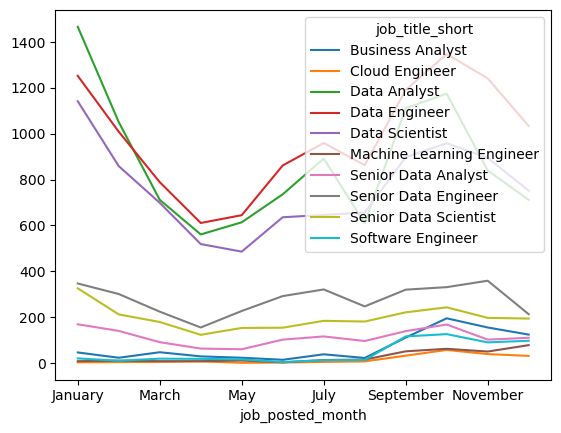

In [83]:
UkJobsPivot.plot(kind='line')

In [84]:
top_3 = df['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3


['Data Analyst', 'Data Engineer', 'Data Scientist']

<Axes: xlabel='job_posted_month'>

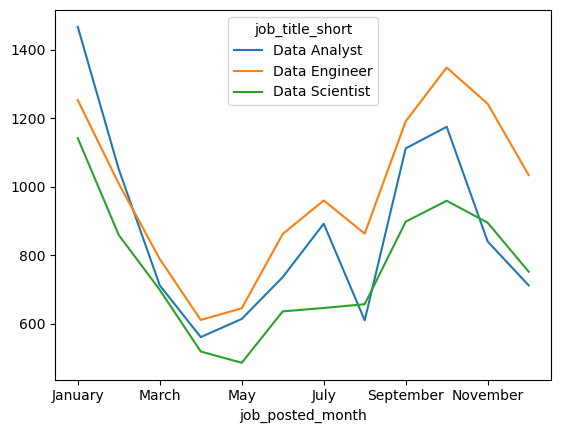

In [85]:
UkJobsPivot[top_3].plot(kind='line')

<Axes: title={'center': 'Top 3 Job Titles in the UK Over Months'}, xlabel='2023', ylabel='Number of Job Postings'>

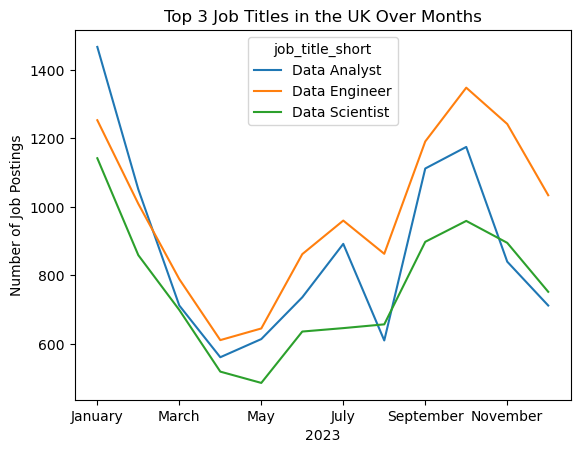

In [86]:


UkJobsPivot[top_3].plot(kind='line', title='Top 3 Job Titles in the UK Over Months', xlabel='2023', ylabel='Number of Job Postings')

In [92]:
#Alternative way
UkJobs['job_posted_month_2'] = UkJobs['job_posted_date'].dt.to_period('M')
UkJobsPivot2 = UkJobs.pivot_table(index= 'job_posted_month_2' , columns = 'job_title_short', aggfunc = 'size').copy()
UkJobsPivot2

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month_2,,,,,,,,,,
2023-01,46,3,1467,1253,1142,8,169,347,326,20
2023-02,23,4,1051,1009,859,10,140,301,212,10
2023-03,47,5,712,789,699,8,91,224,179,19
2023-04,29,7,561,611,519,8,63,155,123,18
2023-05,23,1,614,645,486,11,60,227,153,16
2023-06,14,2,736,862,636,3,102,292,154,4
2023-07,38,5,892,960,646,13,116,321,184,12
2023-08,22,7,610,863,657,15,96,247,181,13
2023-09,111,32,1112,1191,898,51,139,320,221,116


<Axes: title={'center': 'Top 3 Job Titles in the UK Over Months'}, ylabel='Number of Job Postings'>

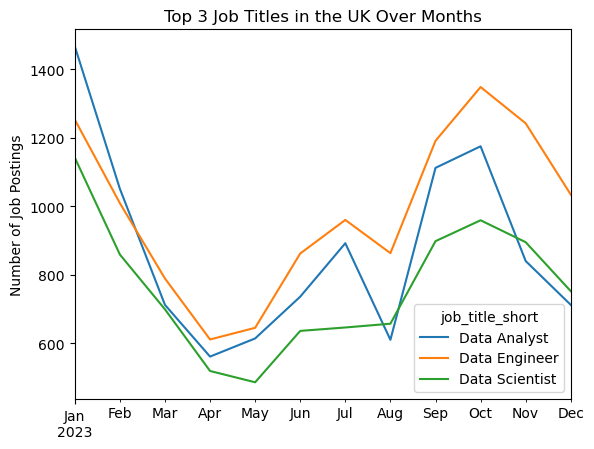

In [93]:
UkJobsPivot2[top_3].plot(kind='line', title='Top 3 Job Titles in the UK Over Months', xlabel='', ylabel='Number of Job Postings')

In [ ]:
# Summary: Top 3 Data Job Titles in the UK (2023)

# Hiring for data roles in the UK, including Data Analysts, Data Engineers, and Data Scientists, followed a clear seasonal pattern throughout 2023. Job postings were highest in January before dropping sharply through the spring months. Activity began to recover in early summer, leading to a strong surge in job openings between August and October when demand peaked across all three roles.

# Data Engineers were in the highest demand overall, reaching more than 1,300 postings during the autumn peak. Data Analysts followed a similar trend, maintaining steady interest throughout the year, while Data Scientists had fewer openings but showed a smoother and more consistent pattern of demand.

# Overall, the data suggests that hiring for data-focused roles in the UK tends to rise at the start and end of the year. This likely reflects company budgeting cycles, new project launches, and end-of-year recruitment pushe